# 1. Importing Files

In [1]:
# Libraries to explore data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Regression Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

# 2. EDA

In [2]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()

Timestamp                  0
Open                 1231878
High                 1231878
Low                  1231878
Close                1231878
Volume_(BTC)         1231878
Volume_(Currency)    1231878
Weighted_Price       1231878
dtype: int64

In [4]:
df1 = df.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1374985d10>,
      dtype=object)

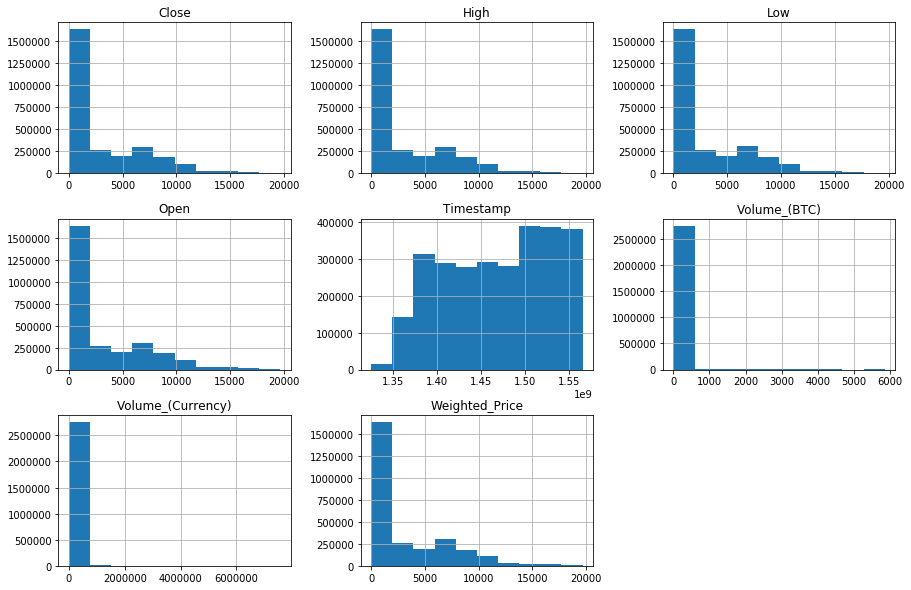

In [5]:
df1.hist(figsize=(15,10))

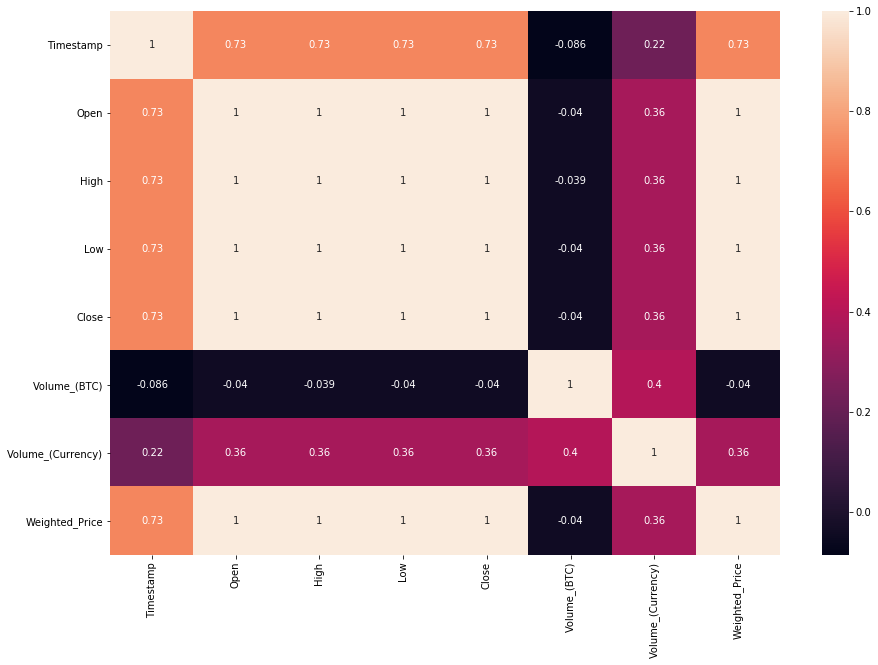

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df1.corr(), annot=True)

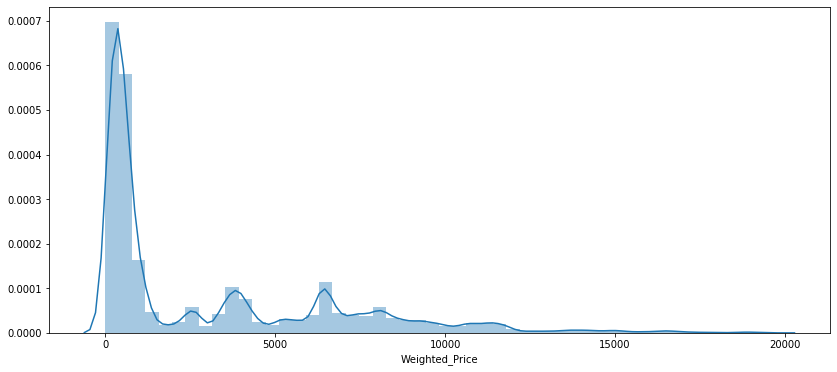

In [7]:
plt.figure(figsize=(14,6))
sns.distplot(df1['Weighted_Price'])

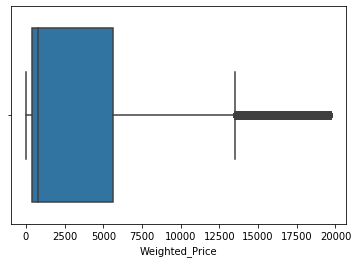

In [8]:
sns.boxplot(df1['Weighted_Price'])

# 3. Standardisation

In [9]:
mms = MinMaxScaler()

# 4. Model

In [10]:
x = df1.drop('Weighted_Price',axis=1)
y = df1['Weighted_Price']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

### Linear Regression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
linreg_score = lr.score(x_test,y_test)

In [16]:
y_predict = lr.predict(x_test)

In [17]:
y_predict[:20]

array([ 3860.72488888,  9432.751328  ,   356.50770432,   590.88764005,
         606.63681953,   452.42342003,   463.62063663,  9937.48505747,
       11170.93791206,   555.98267019,   408.93942904,  4202.03870184,
         431.77887871,  3565.60118612,  9281.81382059,  4999.65261983,
       10851.02219614,   241.38384008,   254.88308009,   448.67816735])

In [18]:
y_test[:20]

3778427     3860.730000
3230998     9439.265946
2049702      356.550000
1268768      590.944337
2477646      606.700000
2088963      452.462377
2079701      463.660000
3228527     9934.079083
3192534    11175.368972
2320929      556.005246
2212075      409.020839
3024042     4201.979733
2095779      431.557711
3741507     3565.773861
3200308     9276.779246
3812797     4999.596526
3174277    10847.361666
1932041      241.561119
1835402      255.078459
2269768      448.735246
Name: Weighted_Price, dtype: float64

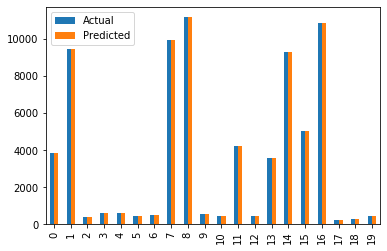

In [19]:
pd.DataFrame({'Actual': y_test[:20].array, 'Predicted': y_predict[:20].flatten()}).plot.bar()

### Decision Tree

In [20]:
neigh = DecisionTreeRegressor()
neigh.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
dtr_score = neigh.score(x_test,y_test)

In [22]:
y_predict = neigh.predict(x_test)

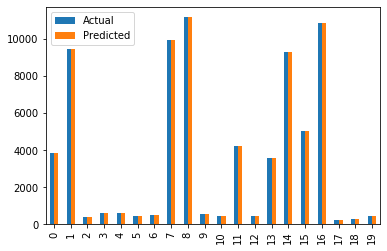

In [23]:
pd.DataFrame({'Actual': y_test[:20].array, 'Predicted': y_predict[:20].flatten()}).plot.bar()

# 5. Score

In [24]:
accuracy = []
models = ['Linear Regression','Decision Tree']
scores = [linreg_score,dtr_score]
for s in scores:
    accuracy.append(round(s*100,2))

In [25]:
score_df = pd.DataFrame({'models' : models,'accuracy' : accuracy})

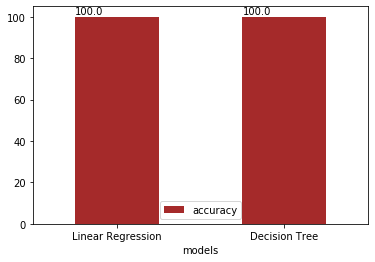

In [26]:
score_plot = score_df.sort_values('accuracy',ascending=False).plot.bar(x='models',rot=0,color=['brown'])
score_plot.set_yticks(range(0,101,20))
for p in score_plot.patches:
    score_plot.annotate(str((p.get_height())), (p.get_x() * 1.005, p.get_height() + 1))

# Thank You